<h1 style="color:green;">Step 1: Overview</h1>
<h4 style="color:black;">Highlevel overview of the analysis and modelling strategy.</h4>

<h3 style="color:blue;">Questions to Ask:</h3>
<ol>
  <li>Do certain gender has more commitment to medical schedules than the other one?</li>
  <li>Where is the most appointments take place?</li>
  <li>What is the percentage of patients who show up on their appointements vs. who don't?</li>
  <li>Do older patients more commited to medical schedules than others?</li>
</ol>

<h3 style="color:blue;">Business Problem:</h3>
<ol>
  <li>Patient no-shows are a long-standing problem that depletes resources and jeopardizes the quality of healthcare services. They also result in the loss of projected income, especially in services where resources are scarce and expensive.</li>
  <li>This could be due to various factors ranging from Age related issues to environmental factors. It could also be due to other ailments patients might have which impede their scheduled visits. For this analysis, we will look at the patient data and try to predict the showup rate of the patients to their appointment at the clinic.</li>
  <li>From the data, we are assuming that Age and the neighbourhood of the clinic could be major factors. So, let's look at the data, perform some exploratory data analysis, pre-process and build machine learning models to predict the likelihood of the patients no-shows.</li>
</ol>

<h1 style="color:green;">Step 2: Dataset</h1>
<h4 style="color:black;">Dataset is sourced from Kaggle which is a collection of medical appointments and consists of other vital information about the patient.</h4>
<br> 
<b> Datasource: </b> https://www.kaggle.com/joniarroba/noshowappointments
<p>

<h3 style="color:blue;">Data Dictionary:</h3>
<ol>
  <li>PatientID: Unique identifier for every patient.</li>
  <li>AppointmentID: Unique identifier for every appointment a patient makes.</li>
  <li>ScheduledDay: Day of the appointment at the clinic.</li>
  <li>AppointmentDay: Day of appointment made.</li>
  <li>Age: Age of the patient.</li>
  <li>Neighbourhood: Locality of the clinic.</li>
  <li>Scholarship: If the patient has scholarship.</li>
  <li>Hipertension: If the patient has hypertension.</li>
  <li>Diabetes: If the patient is diabetic.</li>
  <li>Alcoholism: If the patient is alcoholic.</li>
  <li>Handcap: If the patient is handicapped.</li>
  <li>SMS_received: If the patient has SMS remainder on.</li>
  <li>No-show: If the patient showed up at the clinic for his/her appointment.</li>
</ol>

<p>
Dataset can be uniqely queried based on a combination key of 'PatientID' and 'AppointmentID'.
</p>

<h1 style="color:green;">Step 3: Import Data</h1>
<h4 style="color:black;">Import the dataset by creating a spark session and creating a view.</h4>

In [0]:
#Upload the csv file to databricks
#Import the required libraries

from pyspark.sql import SparkSession

#Import the csv into a dataframe and create a view
df = spark.read.csv('/FileStore/tables/KaggleV2_May_2016.csv',inferSchema=True,header=True)
df.createOrReplaceTempView("km2")

In [0]:
#Import the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint

%matplotlib inline

In [0]:
df.printSchema()

root
 |-- PatientId: double (nullable = true)
 |-- AppointmentID: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- ScheduledDay: timestamp (nullable = true)
 |-- AppointmentDay: timestamp (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Neighbourhood: string (nullable = true)
 |-- Scholarship: integer (nullable = true)
 |-- Hipertension: integer (nullable = true)
 |-- Diabetes: integer (nullable = true)
 |-- Alcoholism: integer (nullable = true)
 |-- Handcap: integer (nullable = true)
 |-- SMS_received: integer (nullable = true)
 |-- No-show: string (nullable = true)



<h3 style="color:blue;">SQL Queries</h3>

<p>
  <strong>
    1. Query the data table
  </strong>
</p>

In [0]:
%sql

select * from km2

PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
2.9872499824296E13,5642903,F,2016-04-29T18:38:08.000+0000,2016-04-29T00:00:00.000+0000,62,JARDIM DA PENHA,0,1,0,0,0,0,No
5.58997776694438E14,5642503,M,2016-04-29T16:08:27.000+0000,2016-04-29T00:00:00.000+0000,56,JARDIM DA PENHA,0,0,0,0,0,0,No
4.262962299951E12,5642549,F,2016-04-29T16:19:04.000+0000,2016-04-29T00:00:00.000+0000,62,MATA DA PRAIA,0,0,0,0,0,0,No
8.67951213174E11,5642828,F,2016-04-29T17:29:31.000+0000,2016-04-29T00:00:00.000+0000,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
8.841186448183E12,5642494,F,2016-04-29T16:07:23.000+0000,2016-04-29T00:00:00.000+0000,56,JARDIM DA PENHA,0,1,1,0,0,0,No
9.5985133231274E13,5626772,F,2016-04-27T08:36:51.000+0000,2016-04-29T00:00:00.000+0000,76,REPÚBLICA,0,1,0,0,0,0,No
7.33688164476661E14,5630279,F,2016-04-27T15:05:12.000+0000,2016-04-29T00:00:00.000+0000,23,GOIABEIRAS,0,0,0,0,0,0,Yes
3.449833394123E12,5630575,F,2016-04-27T15:39:58.000+0000,2016-04-29T00:00:00.000+0000,39,GOIABEIRAS,0,0,0,0,0,0,Yes
5.6394729949972E13,5638447,F,2016-04-29T08:02:16.000+0000,2016-04-29T00:00:00.000+0000,21,ANDORINHAS,0,0,0,0,0,0,No
7.8124564369297E13,5629123,F,2016-04-27T12:48:25.000+0000,2016-04-29T00:00:00.000+0000,19,CONQUISTA,0,0,0,0,0,0,No


<p>
  <strong>
    2. Query Gender and Age Sorted by PatientID
  </strong>
</p>

In [0]:
%sql

select distinct PatientID, AppointmentID, Gender, Age from km2 sort by PatientID

PatientID,AppointmentID,Gender,Age
39217.84439,5751990,F,44
93779.52927,5712759,F,33
5628261.0,5680449,M,13
1.1831856E7,5718578,M,16
5.2168938E7,5704816,F,28
5.2168938E7,5607220,F,28
6.2497926E7,5671723,M,10
6.4851211E7,5683383,F,29
9.5313115E7,5655338,M,27
1.22451254E8,5556646,M,28


<p>
  <strong>
    3. Get the Appointment Details for a Particular Patient
  </strong>
</p>

In [0]:
%sql

select * from km2 where PatientID = 188964456

PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
1.88964456E8,5724671,F,2016-05-20T09:53:26.000+0000,2016-05-20T00:00:00.000+0000,32,SÃO CRISTÓVÃO,0,0,0,0,0,0,No
1.88964456E8,5729804,F,2016-05-24T07:51:47.000+0000,2016-05-24T00:00:00.000+0000,32,SÃO CRISTÓVÃO,0,0,0,0,0,0,No
1.88964456E8,5663856,F,2016-05-05T10:40:13.000+0000,2016-05-18T00:00:00.000+0000,32,SÃO CRISTÓVÃO,0,0,0,0,0,0,No


<h3 style="color:blue;">Clean up Datatypes</h3>
<h4 style="color:black;">Now we check for mismatched datatypes and convert each category appropriately.</h4>

In [0]:
#Import the required libraries

from pyspark.sql.types import IntegerType, DateType
from pyspark.sql.functions import *

#PatientId should be int, not float
df = df.withColumn('PatientId',df['PatientId'].cast(IntegerType()))

df = df.withColumn('ScheduledMonth',month(col('ScheduledDay'))).withColumn('ScheduledDayofWeek',dayofweek(col('ScheduledDay'))).withColumn('ScheduledHour',hour(col('ScheduledDay')))
df = df.withColumn('AppointmentMonth',month(col('AppointmentDay'))).withColumn('AppointmentDayofWeek',dayofweek(col('AppointmentDay')))

In [0]:
#Convert ScheduledDay and AppointmentDay to datetime
df = df.withColumn('ScheduledDay',df['ScheduledDay'].cast(DateType()))
df = df.withColumn('AppointmentDay',df['AppointmentDay'].cast(DateType()))

#Check the dataset
df.show()

+----------+-------------+------+------------+--------------+---+-----------------+-----------+------------+--------+----------+-------+------------+-------+--------------+------------------+-------------+----------------+--------------------+
| PatientId|AppointmentID|Gender|ScheduledDay|AppointmentDay|Age|    Neighbourhood|Scholarship|Hipertension|Diabetes|Alcoholism|Handcap|SMS_received|No-show|ScheduledMonth|ScheduledDayofWeek|ScheduledHour|AppointmentMonth|AppointmentDayofWeek|
+----------+-------------+------+------------+--------------+---+-----------------+-----------+------------+--------+----------+-------+------------+-------+--------------+------------------+-------------+----------------+--------------------+
|2147483647|      5642903|     F|  2016-04-29|    2016-04-29| 62|  JARDIM DA PENHA|          0|           1|       0|         0|      0|           0|     No|             4|                 6|           18|               4|                   6|
|2147483647|      564250

<h3 style="color:blue;">Check for Typos</h3>
<h4 style="color:black;">Correcy typos in column names and sorted the dataset.</h4>

In [0]:
#Rename typo columns
df = df.withColumnRenamed("Hipertension", "Hypertension").withColumnRenamed("Handcap","Handicap").withColumnRenamed("SMS_received", "SMSReceived").withColumnRenamed("No-show", "NoShow")

In [0]:
#Check for typos
print(sorted(df.toPandas()['Neighbourhood'].unique()))

['AEROPORTO', 'ANDORINHAS', 'ANTÔNIO HONÓRIO', 'ARIOVALDO FAVALESSA', 'BARRO VERMELHO', 'BELA VISTA', 'BENTO FERREIRA', 'BOA VISTA', 'BONFIM', 'CARATOÍRA', 'CENTRO', 'COMDUSA', 'CONQUISTA', 'CONSOLAÇÃO', 'CRUZAMENTO', 'DA PENHA', 'DE LOURDES', 'DO CABRAL', 'DO MOSCOSO', 'DO QUADRO', 'ENSEADA DO SUÁ', 'ESTRELINHA', 'FONTE GRANDE', 'FORTE SÃO JOÃO', 'FRADINHOS', 'GOIABEIRAS', 'GRANDE VITÓRIA', 'GURIGICA', 'HORTO', 'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MARIA', 'ILHA DO BOI', 'ILHA DO FRADE', 'ILHA DO PRÍNCIPE', 'ILHAS OCEÂNICAS DE TRINDADE', 'INHANGUETÁ', 'ITARARÉ', 'JABOUR', 'JARDIM CAMBURI', 'JARDIM DA PENHA', 'JESUS DE NAZARETH', 'JOANA D´ARC', 'JUCUTUQUARA', 'MARIA ORTIZ', 'MARUÍPE', 'MATA DA PRAIA', 'MONTE BELO', 'MORADA DE CAMBURI', 'MÁRIO CYPRESTE', 'NAZARETH', 'NOVA PALESTINA', 'PARQUE INDUSTRIAL', 'PARQUE MOSCOSO', 'PIEDADE', 'PONTAL DE CAMBURI', 'PRAIA DO CANTO', 'PRAIA DO SUÁ', 'REDENÇÃO', 'REPÚBLICA', 'RESISTÊNCIA', 'ROMÃO', 'SANTA CECÍLIA', 'SANTA CLARA', 'SANTA HELENA', 'SANTA

In [0]:
#Check Age
print(sorted(df.toPandas()['Age'].unique()))

[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]


In [0]:
df[df['Age'] == -1]

Out[9]: DataFrame[PatientId: int, AppointmentID: int, Gender: string, ScheduledDay: date, AppointmentDay: date, Age: int, Neighbourhood: string, Scholarship: int, Hypertension: int, Diabetes: int, Alcoholism: int, Handicap: int, SMSReceived: int, NoShow: string, ScheduledMonth: int, ScheduledDayofWeek: int, ScheduledHour: int, AppointmentMonth: int, AppointmentDayofWeek: int]

In [0]:
df[df['Age'] == 115]

Out[10]: DataFrame[PatientId: int, AppointmentID: int, Gender: string, ScheduledDay: date, AppointmentDay: date, Age: int, Neighbourhood: string, Scholarship: int, Hypertension: int, Diabetes: int, Alcoholism: int, Handicap: int, SMSReceived: int, NoShow: string, ScheduledMonth: int, ScheduledDayofWeek: int, ScheduledHour: int, AppointmentMonth: int, AppointmentDayofWeek: int]

In [0]:
#Remove erroneous entries
df = df[(df['Age'] < 115) & (df['Age'] > 0)]

In [0]:
#Copy dataframe and drop 'PatientID' and 'AppointmentID'
py_df = df.toPandas()
df = df.drop('PatientId', 'AppointmentID').collect()

In [0]:
#Create pyspark dataframe and print the schema
df = spark.createDataFrame(df)
df.printSchema()

root
 |-- Gender: string (nullable = true)
 |-- ScheduledDay: date (nullable = true)
 |-- AppointmentDay: date (nullable = true)
 |-- Age: long (nullable = true)
 |-- Neighbourhood: string (nullable = true)
 |-- Scholarship: long (nullable = true)
 |-- Hypertension: long (nullable = true)
 |-- Diabetes: long (nullable = true)
 |-- Alcoholism: long (nullable = true)
 |-- Handicap: long (nullable = true)
 |-- SMSReceived: long (nullable = true)
 |-- NoShow: string (nullable = true)
 |-- ScheduledMonth: long (nullable = true)
 |-- ScheduledDayofWeek: long (nullable = true)
 |-- ScheduledHour: long (nullable = true)
 |-- AppointmentMonth: long (nullable = true)
 |-- AppointmentDayofWeek: long (nullable = true)



In [0]:
#Copied pandas dataframe
py_df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,ScheduledMonth,ScheduledDayofWeek,ScheduledHour,AppointmentMonth,AppointmentDayofWeek
0,2147483647,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,6,18,4,6
1,2147483647,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,6,16,4,6
2,2147483647,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,4,6,16,4,6
3,2147483647,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4,6,17,4,6
4,2147483647,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4,6,16,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106977,2147483647,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No,5,3,9,6,3
106978,2147483647,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No,5,3,7,6,3
106979,2147483647,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No,4,4,16,6,3
106980,2147483647,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No,4,4,15,6,3


<h1 style="color:green;">Step 4: EDA</h1>
<h4 style="color:black;">Time for some Exploratory Data Analysis.</h4>

<p>
  <strong>
    1. Does certain gender have more commitment to medical schedules than the other one?
  </strong>
</p>

Out[15]: <AxesSubplot:xlabel='Gender', ylabel='count'>

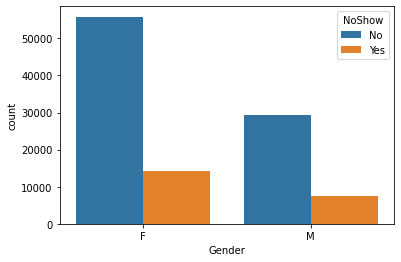

In [0]:
#Plot 'Gender' on 'NoShow'
sns.countplot(x='Gender', hue='NoShow', data=df.toPandas())

**Females have the highest no-shows than Males.**

<p>
  <strong>
    2. Where is the most appointments take place?
  </strong>
</p>

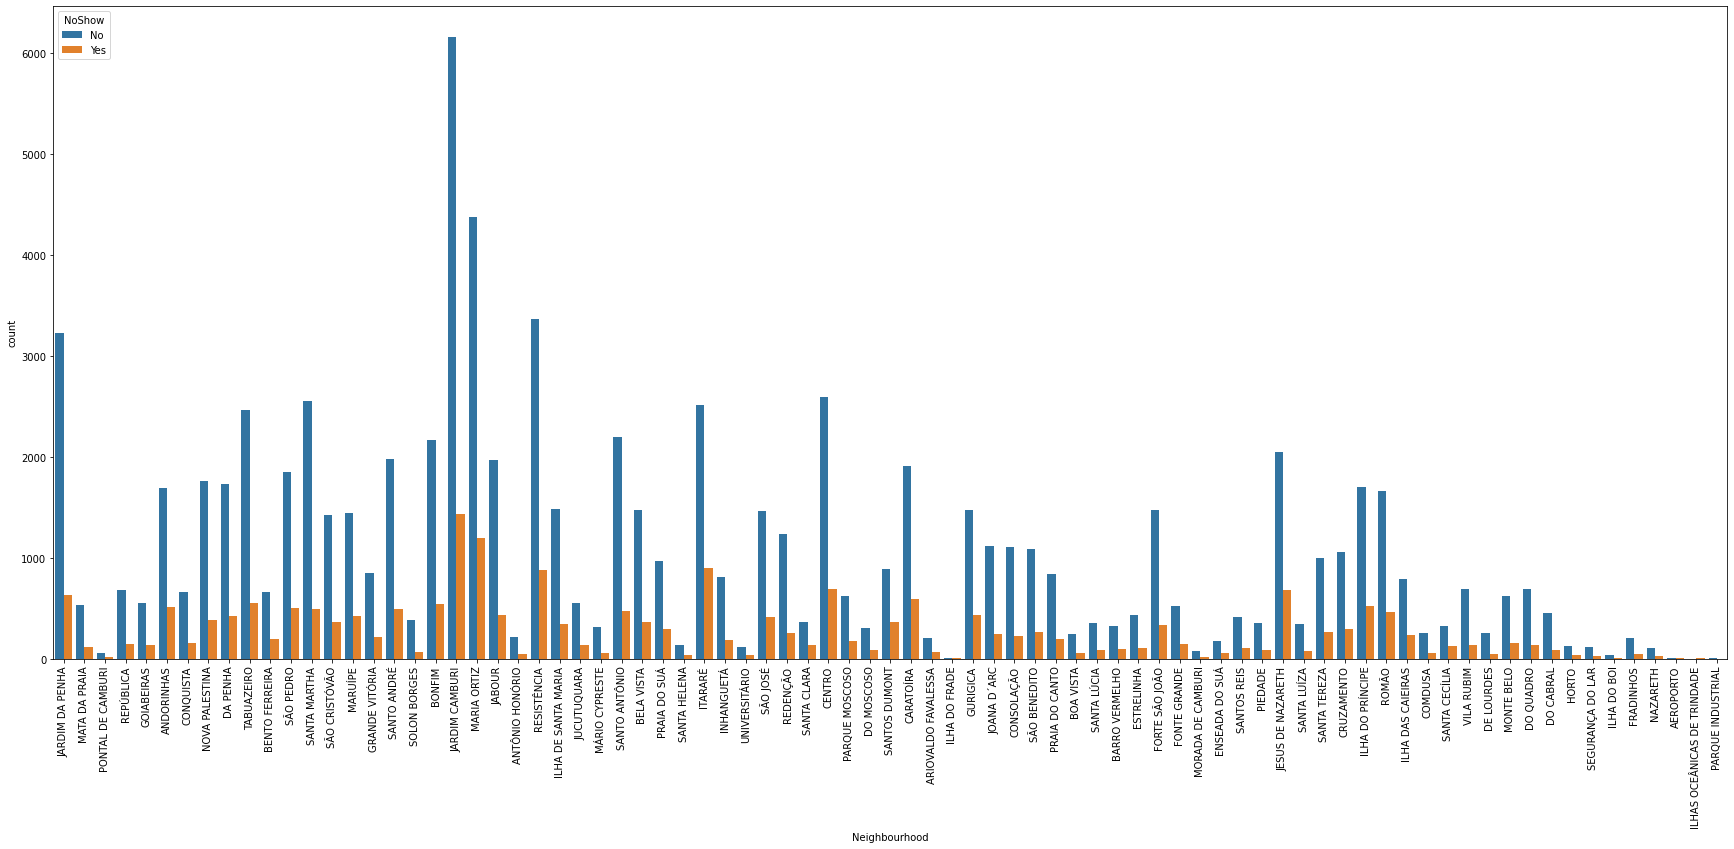

In [0]:
plt.figure(figsize=(30,12))
fig = sns.countplot(x='Neighbourhood',hue='NoShow',data=df.toPandas())
fig.set_xticklabels(fig.get_xticklabels(), rotation=90);

**JARDIM CAMBURI the highest number of visits.**

Out[17]: <AxesSubplot:>

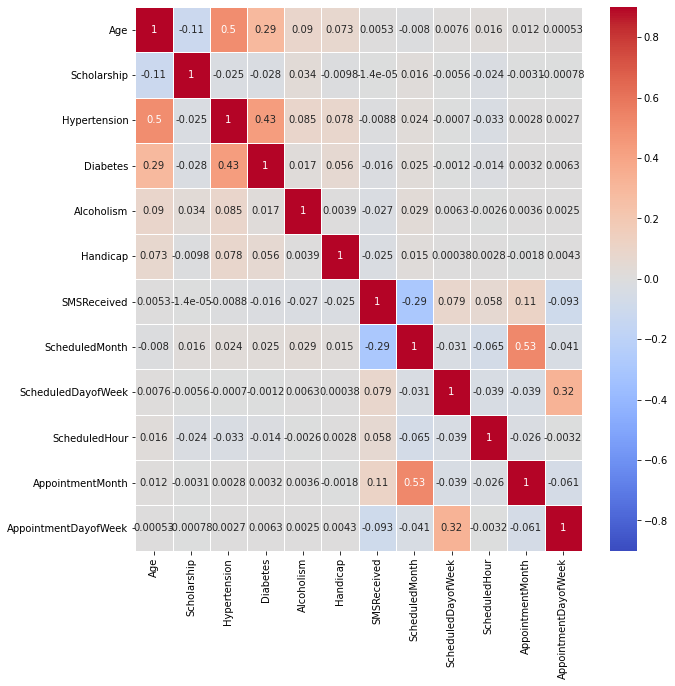

In [0]:
#Correlation plot
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(df.toPandas().corr(), vmin=-0.9, vmax=0.9, annot=True, cmap='coolwarm', linewidths=.5, ax=ax)

<p>
  <strong>
    3. What is the percentage of patients who show up on their appointements vs. who didn't?
  </strong>
</p>

In [0]:
#edit the reversed meaning of No show to be positive,
#0 will mean that patient didn't come to his appointement.
#1 will mean that patient came to his appointment.

py_df["NoShow"].replace({"Yes":1,"No":0},inplace=True)
py_df["NoShow"] = pd.to_numeric(py_df["NoShow"]) #change datatype for column to be numeric integer.

no_show_up = py_df[py_df["NoShow"]==1].count()["PatientId"] #count of patients who showed up on thier appoinments.
show_up = py_df[py_df["NoShow"]==0].count()["PatientId"] #count of patients who didn't show up on thier appoinments.

print("Number of patients that didn't show up:", no_show_up)
print("Number of patients that did show up:", show_up)

Number of patients that didn't show up: 21677
Number of patients that did show up: 85305


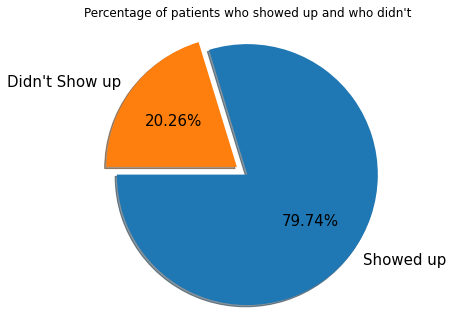

In [0]:
label_Names = ["Showed up", "Didn't Show up"]
data = [show_up, no_show_up]


explode = (0, 0.15) #only explode the didn't show up slice.
plt.axis('equal'); #to keep aspect ratio equal to appear as a fine circle.
plt.pie(data,radius=1.5,shadow=True ,labels = label_Names,explode=explode, startangle=180,autopct='%0.2f%%',textprops = {"fontsize":15})
plt.title("Percentage of patients who showed up and who didn't",y=1.2);
#autopct to show percentage, 0.2 for two decimal place

<p>
  <strong>
    4. Do older patients more commited to medical schedules than others?
  </strong>
</p>

In [0]:
#Method to get the values between a given age range
def dataframe_age(data,column,l1,l2):
    """This function returns a new dataframe from an input dataframe and apply a condition
    to a certain column to be whithin 2 numerical limits
    
    ------------------------------------
    input:
    ------
    data: original data frame that you want to make a supset from it.
    column: column name in the original data frame that we will apply limit condition to. (Case Sensitive)
    l1: the lower limit of the column.
    l2: the higher limit of the column.
    
    output:
    ------
    a new dataframe with all columns in the original one but only the rows which meet the condition.
    """
    if l2<l1:
        l1,l2 = l2,l1
    return data.query("{} <= {} <= {}".format(l1,column,l2))

In [0]:
#Get dataframes for each age category
childs = py_df.query("Age < 18")
age_18_24 = dataframe_age(py_df,"Age",18,24)
age_25_34 = dataframe_age(py_df,"Age",25,34)
age_35_44 = dataframe_age(py_df,"Age",35,44)
age_45_54 = dataframe_age(py_df,"Age",45,54)
age_55_64 = dataframe_age(py_df,"Age",55,64)
old = py_df.query("Age >= 65")

In [0]:
#Calculate mean for each age category
mean_childs = childs["NoShow"].mean()
mean_18_24 = age_18_24["NoShow"].mean()
mean_25_34 = age_25_34["NoShow"].mean()
mean_35_44 = age_35_44["NoShow"].mean()
mean_45_54 = age_45_54["NoShow"].mean()
mean_55_64 = age_55_64["NoShow"].mean()
mean_old = old["NoShow"].mean()

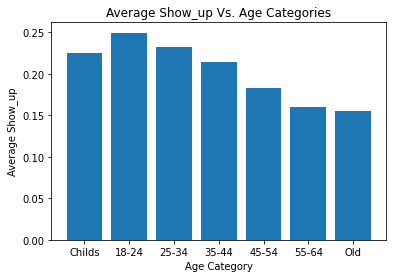

In [0]:
#Draw Bar plot for the data
locations = [1, 2, 3, 4, 5, 6, 7]
heights = [mean_childs, mean_18_24, mean_25_34, mean_35_44, mean_45_54, mean_55_64, mean_old]
labels = ["Childs","18-24","25-34", "35-44", "45-54", "55-64", "Old"]
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Show_up Vs. Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Average Show_up');

**Older patients are more commited to their appointment schedules than younger ones.**

<h3 style="color:blue;">EDA Conclusions</h3>
<h4 style="color:black;">Now we'll list out our conclusions from the Exploratory Data Analysis:</h4>
<ol>
  <li>Percentage of patients who show up on their appointments represents 79.7%.</li>
  <li>Percentage of patients who Don't show up on their appointments represents 20.2%.</li>
  <li>Both genders have same commitment to medical schedules.</li>
  <li>Patients Who didn't show up have an average of 15 days between registeration day and their appointments.</li>
  <li>Patients Who show up have an average of 8 days between registeration day and their appointments.</li>
  <li>As Duration increases, the ability of patients to show up on their appointments decreases.</li>
  <li>"JARDIM CAMBURI" is the most frequent place.</li>
  <li>Younger patients are more commited to their appointments' schedules than old ones.</li>
</ol>

<h1 style="color:green;">Step 5: Preprocessing</h1>
<h4 style="color:black;">Next we prepare data for modelling, creating logical variables and dropping redundant features.</h4>

In [0]:
#Rename columns
df = df.withColumn('AppointmentDayofWeek',dayofweek(col('AppointmentDay'))).withColumn('ScheduledDayofWeek',dayofweek(col('ScheduledDay')))

<h3 style="color:blue;">Create Featues and Labels</h3>
<h4 style="color:black;">Now, let's create feature matrix and split the data into train and test splits.</h4>

In [0]:
#Import required libraries
from pyspark.conf import SparkConf
from pyspark.sql.types import * 
from pyspark.sql.functions import col, asc,desc
from pyspark.sql import SQLContext
from pyspark.mllib.stat import Statistics
from pyspark.sql.functions import udf
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler,StandardScaler
from pyspark.ml import Pipeline

<h3 style="color:blue;">Target Variable Distribution</h3>

In [0]:
df.groupby("NoShow").count().show()

+------+-----+
|NoShow|count|
+------+-----+
|    No|85305|
|   Yes|21677|
+------+-----+



<h3 style="color:blue;">Distribution of Features</h3>

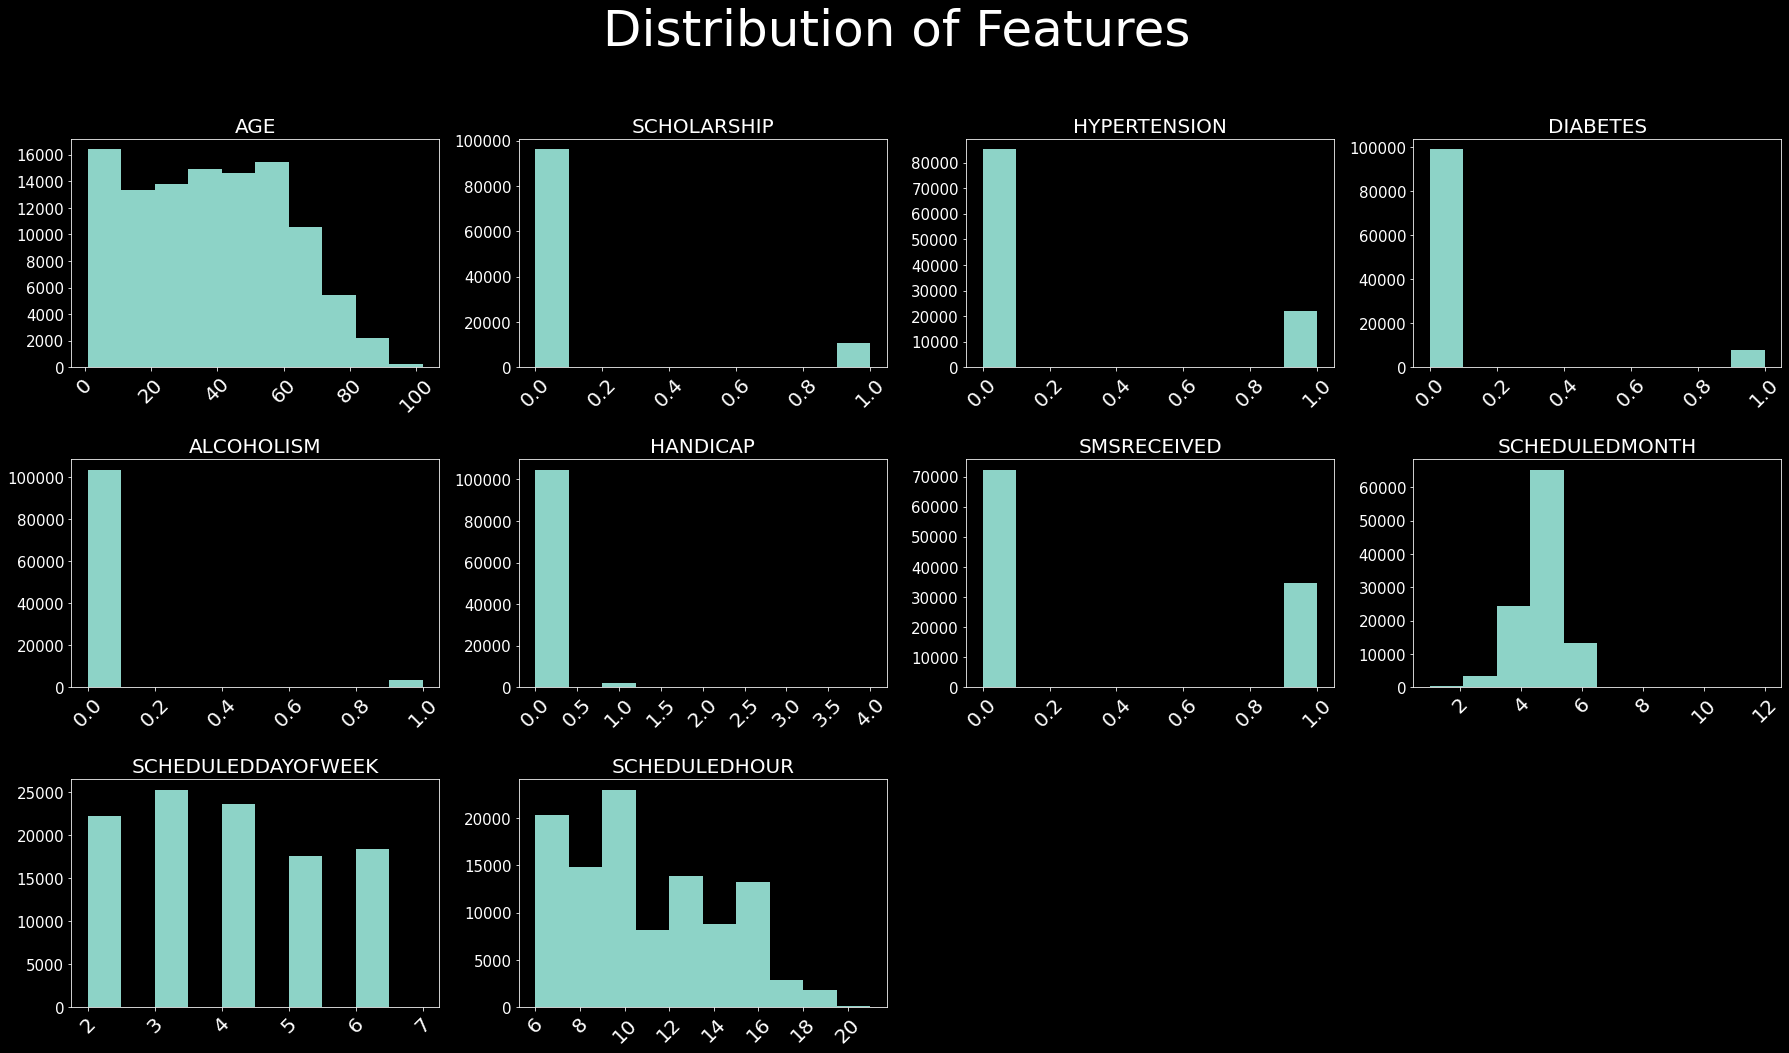

In [0]:
#Note: Run this cell again to get correct plots (Seems like a memeory issue)
from matplotlib import cm

fig = plt.figure(figsize=(25,15)) ## Plot Size 
st = fig.suptitle("Distribution of Features", fontsize=50,
                  verticalalignment='center') # Plot Main Title 

for col,num in zip(df.toPandas().describe().columns, range(1,11)):
    ax = fig.add_subplot(3,4,num)
    ax.hist(df.toPandas()[col])
    plt.style.use('dark_background') 
    plt.grid(False)
    plt.xticks(rotation=45,fontsize=20)
    plt.yticks(fontsize=15)
    plt.title(col.upper(),fontsize=20)
plt.tight_layout()
st.set_y(0.95)
fig.subplots_adjust(top=0.85,hspace = 0.4)
plt.show()

<h3 style="color:blue;">User Defined Functions</h3>

In [0]:
#Method to categorize age variable
def udf_multiple(age):
      if (age <= 24):
        return 'Under 25'
      elif (age >= 25 and age <= 34):
        return 'Between 25 and 34'
      elif (age >= 35 and age <= 44):
        return 'Between 35 and 44'
      elif (age >= 45 and age <= 54):
        return 'Between 45 and 54'
      elif (age >= 55 and age <= 64):
        return 'Between 55 and 64'
      elif (age >= 65):
        return 'Over 64'
      else: return 'N/A'

education_udf = udf(udf_multiple)
df=df.withColumn("Age_udf", education_udf('Age'))

In [0]:
df.toPandas()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,ScheduledMonth,ScheduledDayofWeek,ScheduledHour,AppointmentMonth,AppointmentDayofWeek,Age_udf
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,6,18,4,6,Between 55 and 64
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,6,16,4,6,Between 55 and 64
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,4,6,16,4,6,Between 55 and 64
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4,6,17,4,6,Under 25
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4,6,16,4,6,Between 55 and 64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106977,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No,5,3,9,6,3,Between 55 and 64
106978,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No,5,3,7,6,3,Between 45 and 54
106979,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No,4,4,16,6,3,Under 25
106980,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No,4,4,15,6,3,Between 35 and 44


In [0]:
#Drop 'Age' column
df = df.drop("Age")

<h3 style="color:blue;">Preparing Data for ML</h3>
<h4 style="color:black;">Feature transformer that merges multiple columns into a vector column.</h4>

In [0]:
cols = df.columns
categoricalColumns = ['Gender', 'Neighbourhood', 'Age_udf']
stages = []
for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]
label_stringIdx = StringIndexer(inputCol = 'NoShow', outputCol = 'label')
stages += [label_stringIdx]
numericCols = ["Scholarship","Hypertension","Diabetes","Alcoholism","Handicap","SMSReceived"]
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

<h3 style="color:blue;">Pipeline</h3>

In [0]:
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df)
df = pipelineModel.transform(df)
selectedCols = ['label', 'features'] + cols
df = df.select(selectedCols)
df.printSchema()

root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- Gender: string (nullable = true)
 |-- ScheduledDay: date (nullable = true)
 |-- AppointmentDay: date (nullable = true)
 |-- Neighbourhood: string (nullable = true)
 |-- Scholarship: long (nullable = true)
 |-- Hypertension: long (nullable = true)
 |-- Diabetes: long (nullable = true)
 |-- Alcoholism: long (nullable = true)
 |-- Handicap: long (nullable = true)
 |-- SMSReceived: long (nullable = true)
 |-- NoShow: string (nullable = true)
 |-- ScheduledMonth: long (nullable = true)
 |-- ScheduledDayofWeek: integer (nullable = true)
 |-- ScheduledHour: long (nullable = true)
 |-- AppointmentMonth: long (nullable = true)
 |-- AppointmentDayofWeek: integer (nullable = true)
 |-- Age_udf: string (nullable = true)



In [0]:
pd.DataFrame(df.take(5), columns=df.columns).transpose()

,0,1,2,3,4
label,0.0,0.0,0.0,0.0,0.0
features,"(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."
Gender,F,M,F,F,F
ScheduledDay,2016-04-29,2016-04-29,2016-04-29,2016-04-29,2016-04-29
AppointmentDay,2016-04-29,2016-04-29,2016-04-29,2016-04-29,2016-04-29
Neighbourhood,JARDIM DA PENHA,JARDIM DA PENHA,MATA DA PRAIA,PONTAL DE CAMBURI,JARDIM DA PENHA
Scholarship,0,0,0,0,0
Hypertension,1,0,0,0,1
Diabetes,0,0,0,0,1
Alcoholism,0,0,0,0,0


<h3 style="color:blue;">Train / Test Split</h3>

In [0]:
train, test = df.randomSplit([0.7, 0.3], seed = 2021)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 74683
Test Dataset Count: 32299


<h1 style="color:green;">Step 6: Modelling</h1>
<h4 style="color:black;">Now we'll make some predictions using Machine Learning models.</h4>

<h3 style="color:blue;">Logistic Regression</h3>
<h4 style="color:black;">We'll start with a logistic regression model.</h4>

In [0]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr.fit(train)

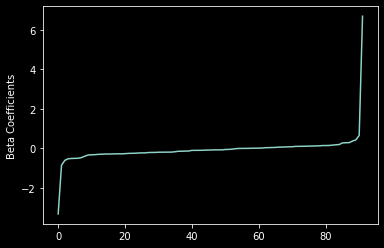

In [0]:
#Beta-Coeff plot
import matplotlib.pyplot as plt
import numpy as np
beta = np.sort(lrModel.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

In [0]:
#ROC curve
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

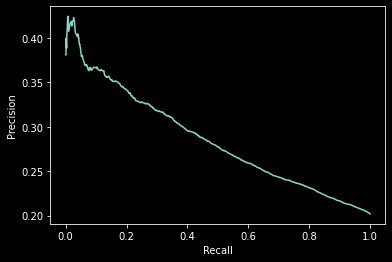

In [0]:
#Plot to compare precision and recall
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [0]:
#Model predictions
predictions = lrModel.transform(test)
predictions.select('Age_udf', 'Neighbourhood', 'label', 'rawPrediction', 'prediction', 'probability').show(30)

+-----------------+--------------+-----+--------------------+----------+--------------------+
|          Age_udf| Neighbourhood|label|       rawPrediction|prediction|         probability|
+-----------------+--------------+-----+--------------------+----------+--------------------+
|Between 25 and 34|JARDIM CAMBURI|  0.0|[1.50061899933422...|       0.0|[0.81766677960037...|
|Between 25 and 34|JARDIM CAMBURI|  0.0|[1.50061899933422...|       0.0|[0.81766677960037...|
|         Under 25|JARDIM CAMBURI|  0.0|[1.48436048229469...|       0.0|[0.81523030256214...|
|         Under 25|JARDIM CAMBURI|  0.0|[1.48436048229469...|       0.0|[0.81523030256214...|
|         Under 25|JARDIM CAMBURI|  0.0|[1.48436048229469...|       0.0|[0.81523030256214...|
|         Under 25|JARDIM CAMBURI|  0.0|[1.48436048229469...|       0.0|[0.81523030256214...|
|         Under 25|JARDIM CAMBURI|  0.0|[1.48436048229469...|       0.0|[0.81523030256214...|
|         Under 25|JARDIM CAMBURI|  0.0|[0.82513491407590...

In [0]:
#Area under the curve
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.6094621179250687


<h3 style="color:blue;">Decision Tree Classifier</h3>
<h4 style="color:black;">Next, we'll try a decision tree model.</h4>

In [0]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(train)

#Model predictions
predictions = dtModel.transform(test)
predictions.select('Age_udf', 'Neighbourhood', 'label', 'rawPrediction', 'prediction', 'probability').show(30)

+-----------------+--------------+-----+-----------------+----------+--------------------+
|          Age_udf| Neighbourhood|label|    rawPrediction|prediction|         probability|
+-----------------+--------------+-----+-----------------+----------+--------------------+
|Between 25 and 34|JARDIM CAMBURI|  0.0|[59607.0,15076.0]|       0.0|[0.79813344402340...|
|Between 25 and 34|JARDIM CAMBURI|  0.0|[59607.0,15076.0]|       0.0|[0.79813344402340...|
|         Under 25|JARDIM CAMBURI|  0.0|[59607.0,15076.0]|       0.0|[0.79813344402340...|
|         Under 25|JARDIM CAMBURI|  0.0|[59607.0,15076.0]|       0.0|[0.79813344402340...|
|         Under 25|JARDIM CAMBURI|  0.0|[59607.0,15076.0]|       0.0|[0.79813344402340...|
|         Under 25|JARDIM CAMBURI|  0.0|[59607.0,15076.0]|       0.0|[0.79813344402340...|
|         Under 25|JARDIM CAMBURI|  0.0|[59607.0,15076.0]|       0.0|[0.79813344402340...|
|         Under 25|JARDIM CAMBURI|  0.0|[59607.0,15076.0]|       0.0|[0.79813344402340...|

In [0]:
#Area under the curve
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.5


<h3 style="color:blue;">Random Forest</h3>
<h4 style="color:black;">Let's see if we can improve that with a random forest classifier.</h4>

In [0]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rfModel = rf.fit(train)

#Model predictions
predictions = rfModel.transform(test)
predictions.select('Age_udf', 'Neighbourhood', 'label', 'rawPrediction', 'prediction', 'probability').show(30)

+-----------------+--------------+-----+--------------------+----------+--------------------+
|          Age_udf| Neighbourhood|label|       rawPrediction|prediction|         probability|
+-----------------+--------------+-----+--------------------+----------+--------------------+
|Between 25 and 34|JARDIM CAMBURI|  0.0|[15.9341392523927...|       0.0|[0.79670696261963...|
|Between 25 and 34|JARDIM CAMBURI|  0.0|[15.9341392523927...|       0.0|[0.79670696261963...|
|         Under 25|JARDIM CAMBURI|  0.0|[15.9256547589011...|       0.0|[0.79628273794505...|
|         Under 25|JARDIM CAMBURI|  0.0|[15.9256547589011...|       0.0|[0.79628273794505...|
|         Under 25|JARDIM CAMBURI|  0.0|[15.9256547589011...|       0.0|[0.79628273794505...|
|         Under 25|JARDIM CAMBURI|  0.0|[15.9256547589011...|       0.0|[0.79628273794505...|
|         Under 25|JARDIM CAMBURI|  0.0|[15.9256547589011...|       0.0|[0.79628273794505...|
|         Under 25|JARDIM CAMBURI|  0.0|[15.6765592085270...

In [0]:
#Area under the curve
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.5961467860951974


<h3 style="color:blue;">Gradient-Boosted Tree Classifier</h3>
<h4 style="color:black;">Finally let's see if we can improve our results from random forest classifier by using a gradient-boosted tree classifer.</h4>

In [0]:
from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(maxIter=10)
gbtModel = gbt.fit(train)

#Model predictions
predictions = gbtModel.transform(test)
predictions.select('Age_udf', 'Neighbourhood', 'label', 'rawPrediction', 'prediction', 'probability').show(30)

+-----------------+--------------+-----+--------------------+----------+--------------------+
|          Age_udf| Neighbourhood|label|       rawPrediction|prediction|         probability|
+-----------------+--------------+-----+--------------------+----------+--------------------+
|Between 25 and 34|JARDIM CAMBURI|  0.0|[0.75485933860824...|       0.0|[0.81901951108414...|
|Between 25 and 34|JARDIM CAMBURI|  0.0|[0.75485933860824...|       0.0|[0.81901951108414...|
|         Under 25|JARDIM CAMBURI|  0.0|[0.70685470331167...|       0.0|[0.80435035525606...|
|         Under 25|JARDIM CAMBURI|  0.0|[0.70685470331167...|       0.0|[0.80435035525606...|
|         Under 25|JARDIM CAMBURI|  0.0|[0.70685470331167...|       0.0|[0.80435035525606...|
|         Under 25|JARDIM CAMBURI|  0.0|[0.70685470331167...|       0.0|[0.80435035525606...|
|         Under 25|JARDIM CAMBURI|  0.0|[0.70685470331167...|       0.0|[0.80435035525606...|
|         Under 25|JARDIM CAMBURI|  0.0|[0.41209009497676...

In [0]:
#Area under the curve
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.6048406832987865


In [0]:
#Model evaluation
print(gbt.explainParams())

cacheNodeIds: If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees. Users can set how often should the cache be checkpointed or disable it by setting checkpointInterval. (default: False)
checkpointInterval: set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. Note: this setting will be ignored if the checkpoint directory is not set in the SparkContext. (default: 10)
featureSubsetStrategy: The number of features to consider for splits at each tree node. Supported options: 'auto' (choose automatically for task: If numTrees == 1, set to 'all'. If numTrees > 1 (forest), set to 'sqrt' for classification and to 'onethird' for regression), 'all' (use all features), 'onethird' (use 1/3 of the features), 'sqrt' (use sqrt(number of features)), 'log2' (use log2(number of features)), 

In [0]:
# from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# paramGrid = (ParamGridBuilder()
#              .addGrid(gbt.maxDepth, [2, 4, 6])
#              .addGrid(gbt.maxBins, [20, 60])
#              .addGrid(gbt.maxIter, [10, 20])
#              .build())

# cv = CrossValidator(estimator=gbt, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)

# # Run cross validations.  This can take about 6 minutes since it is training over 20 trees!
# cvModel = cv.fit(train)
# predictions = cvModel.transform(test)
# evaluator.evaluate(predictions)

In [0]:
y_true = predictions.select(['label']).collect()
y_pred = predictions.select(['prediction']).collect()

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

#Print classification report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89     25698
         1.0       0.26      0.00      0.00      6601

    accuracy                           0.80     32299
   macro avg       0.53      0.50      0.44     32299
weighted avg       0.69      0.80      0.71     32299



In [0]:
#Print confusion matrix
print("Confusion matrix:\n",confusion_matrix(y_true, y_pred))

Confusion matrix:
 [[25681    17]
 [ 6595     6]]


<h1 style="color:green;">Step 7: Conclusion</h1>
<h3 style="color:blue;">Analysing our Machine Learning models:</h3>
<ol>
  <li>From our analysis Logistic Regression model performed the best with highest ROC, at 0.609, which is closely followed by the Gradient-Boosted Tree Classifier at 0.604.</li>
  <li>Our worst perfoming models are the Random Forest at 0.596 and Decision Tree Classifier at 0.5. So, we can say our Gradient-Boosted Tree Classifier did a better job of classifying our positive/negative class (Patients showing-up/not showing-up for appointment) in the dataset.</li>
  <li>Usually an ROC value of 0.7-0.8 is considered acceptable, but our values lie close to the center line which is a random chance. So, we probably need to improve our model by trying out other classification techniques.</li>
</ol>

<h3 style="color:blue;">Interpretation:</h3>
<ol>
  <li>Our model correctly classifies if there is a show-up at the clinic 80% of the time. Which is not bad but can be further improved by expanding the featureset.</li>
  <li>Based on our initial assumption, gender doesn't play a significant role in the commitment to the appointments at the clinic.</li>
  <li>Age plays a major role where the younger patients are more commited to their appointment schedules than the older ones. Makes sense as younger patients can visit a clinic by themselves where as older patients need help.</li>
</ol>

<h3 style="color:blue;">Recommendations:</h3>
<ol>
  <li>"JARDIM CAMBURI" is most frequented so it would be best to study the systems and procedures employed at that clinic and replicate those in the other clinics as well.</li>
  <li>It would help with reducing no-shows if the clinics try to reduce wait time between the appointment and scheduled days.</li>
  <li>Another recommendation is to have other ways of remainder systems like Email/Phone in place to regularly check with the older patients as SMS usage among the older groups tend to be lower due to small screens on mobile phones and difficulty to read.</li>
</ol>

<h3 style="color:blue;">References:</h3>
<ol>
  <li>https://www.kaggle.com/joniarroba/noshowappointments</li>
  <li>https://towardsdatascience.com/apache-spark-mllib-tutorial-part-3-complete-classification-workflow-a1eb430ad069</li>
  <li>https://towardsdatascience.com/machine-learning-with-pyspark-and-mllib-solving-a-binary-classification-problem-96396065d2aa</li>
</ol>